In [16]:
import pandas as pd

# 엑셀 파일 경로 설정
file_path = '../raw/3_구조의장 생산설계 DP 현황_구조생설 D_P&BOM TOTAL LIST 조회(3개 호선)_설명포함.xlsx'

# 첫 번째 시트 읽기 (주제 및 데이터 설명)
data_overview = pd.read_excel(file_path, sheet_name=0)

# 데이터 프레임 출력
print(data_overview.head())

     1           주제                              구조/의장 생산설계 DP 현황 (구조)  \
0  NaN          NaN                                                NaN   
1  2.0  RAW DATA 내용  설계도면들은 각각 DP(Drawing Program) 를 가지고 이를 확인 후 도면...   
2  NaN          NaN                    도면 중 생산설계 DP 관련 일정 및 실적 확인 DATA   
3  NaN          NaN                                                NaN   
4  3.0    Column 설명  (데이터 분석 관점에서 주요 column은 노란색 셀로 표시, 개인 관점에 따라 달...   

  Unnamed: 3  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [17]:
# 엑셀 파일 객체 생성
excel_file = pd.ExcelFile(file_path)

# 모든 시트 이름 가져오기
sheet_names = excel_file.sheet_names

# 첫 번째 시트를 제외한 모든 시트의 데이터를 읽어와 병합
all_data = pd.DataFrame()
for sheet in sheet_names[1:]:  # 첫 번째 시트 제외
    sheet_data = pd.read_excel(file_path, sheet_name=sheet)
    all_data = pd.concat([all_data, sheet_data], ignore_index=True)

# 데이터 프레임 출력
print(all_data.head())

   No 프로젝트      D/P&BOM 코드 D/P&BOM 내역 설계기능 도면종류  협력사 직영책임부서    작업 출도계획  \
0   1   P1  DPBOM000000001         도장   F1   D1  NaN     D1 2014-07-13   
1   2   P1  DPBOM000000002         도장   F1   D1  NaN     D1 2014-07-13   
2   3   P1  DPBOM000000003         가공   F2   D2   D5     D3 2014-07-14   
3   4   P1  DPBOM000000004         족장   F3   D3  NaN     D4 2014-07-21   
4   5   P1  DPBOM000000005         공작   F2   D4   D5     D3 2014-07-21   

     작업 출도실적  
0 2014-07-10  
1 2014-07-10  
2 2014-07-09  
3 2014-06-30  
4 2014-06-16  


In [18]:
# 결측치 확인
missing_values = all_data.isnull().sum()

# 결측치 및 데이터 특성 출력
print("결측치 개수:\n", missing_values)

결측치 개수:
 No               0
프로젝트             0
D/P&BOM 코드       0
D/P&BOM 내역       0
설계기능             0
도면종류             0
협력사           2451
직영책임부서           0
작업 출도계획          0
작업 출도실적          0
dtype: int64


In [19]:
# 협력사 열 결측치 처리
# '협력사'라는 열의 결측치를 'N/A'로 채움
data_cleaned = all_data.copy()
if '협력사' in data_cleaned.columns:
    data_cleaned['협력사'].fillna('자체 진행', inplace=True)

# 결측치 처리 후 데이터 확인
print("협력사 결측치 처리 후 데이터 개요:")
print(data_cleaned['협력사'].isnull().sum())  # 협력사 열의 결측치가 없는지 확인
print(data_cleaned.head())

협력사 결측치 처리 후 데이터 개요:
0
   No 프로젝트      D/P&BOM 코드 D/P&BOM 내역 설계기능 도면종류    협력사 직영책임부서    작업 출도계획  \
0   1   P1  DPBOM000000001         도장   F1   D1  자체 진행     D1 2014-07-13   
1   2   P1  DPBOM000000002         도장   F1   D1  자체 진행     D1 2014-07-13   
2   3   P1  DPBOM000000003         가공   F2   D2     D5     D3 2014-07-14   
3   4   P1  DPBOM000000004         족장   F3   D3  자체 진행     D4 2014-07-21   
4   5   P1  DPBOM000000005         공작   F2   D4     D5     D3 2014-07-21   

     작업 출도실적  
0 2014-07-10  
1 2014-07-10  
2 2014-07-09  
3 2014-06-30  
4 2014-06-16  


C:\Users\samsung\AppData\Local\Temp\ipykernel_22020\3170943.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['협력사'].fillna('자체 진행', inplace=True)


In [20]:
data_cleaned['작업 출도계획'] = pd.to_datetime(data_cleaned['작업 출도계획'], errors='coerce')
data_cleaned['작업 출도실적'] = pd.to_datetime(data_cleaned['작업 출도실적'], errors='coerce')

In [21]:
import os

# 폴더 생성
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')

# 전처리된 데이터 저장
data_cleaned.to_csv('processed_data/processed_data_3.csv', index=False)

C:\Users\samsung\AppData\Local\Temp\ipykernel_22020\3742055356.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=project_counts, x='프로젝트', y='작업량', palette=colors, order=project_counts['프로젝트'])


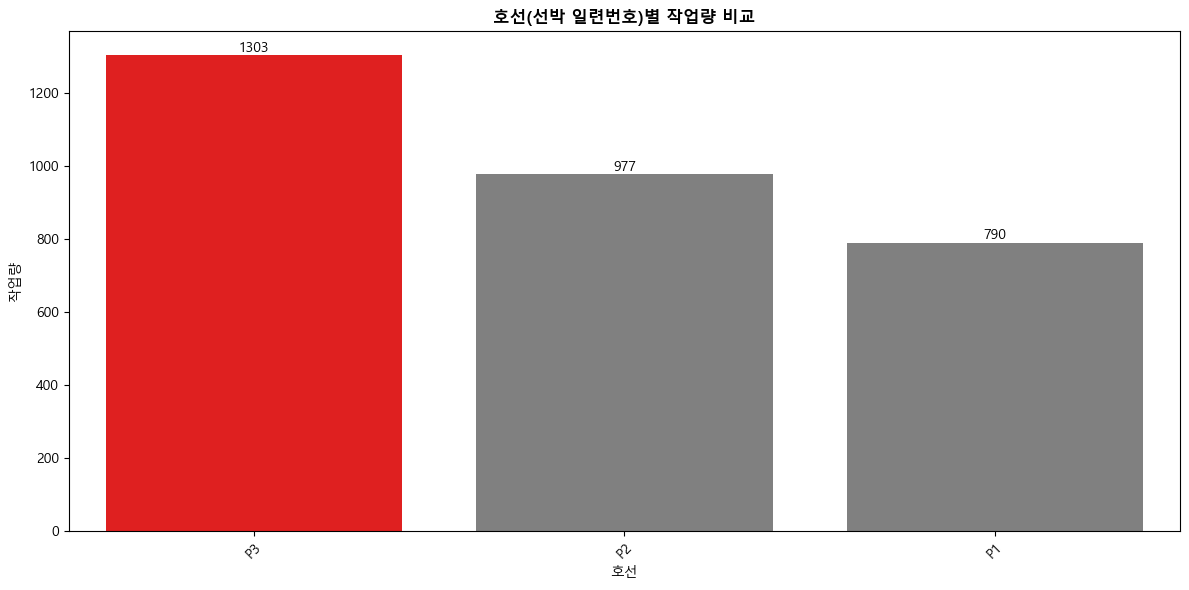

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (필요한 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 프로젝트별 작업량 집계
project_counts = data_cleaned['프로젝트'].value_counts().reset_index()
project_counts.columns = ['프로젝트', '작업량']

# 최대값 프로젝트 찾기
max_project = project_counts['프로젝트'][project_counts['작업량'].idxmax()]

# 색상 설정: 최대값은 빨간색, 나머지는 회색
colors = ['red' if project == max_project else 'grey' for project in project_counts['프로젝트']]

# 프로젝트별 작업량 비교 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=project_counts, x='프로젝트', y='작업량', palette=colors, order=project_counts['프로젝트'])
plt.title('호선(선박 일련번호)별 작업량 비교', fontweight='bold')
plt.xlabel('호선')
plt.ylabel('작업량')
plt.xticks(rotation=45)

# 각 막대 위에 작업량 레이블 추가
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\samsung\AppData\Local\Temp\ipykernel_22020\1710227462.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_work_counts.index, y=department_work_counts.values, ax=ax, palette=colors)


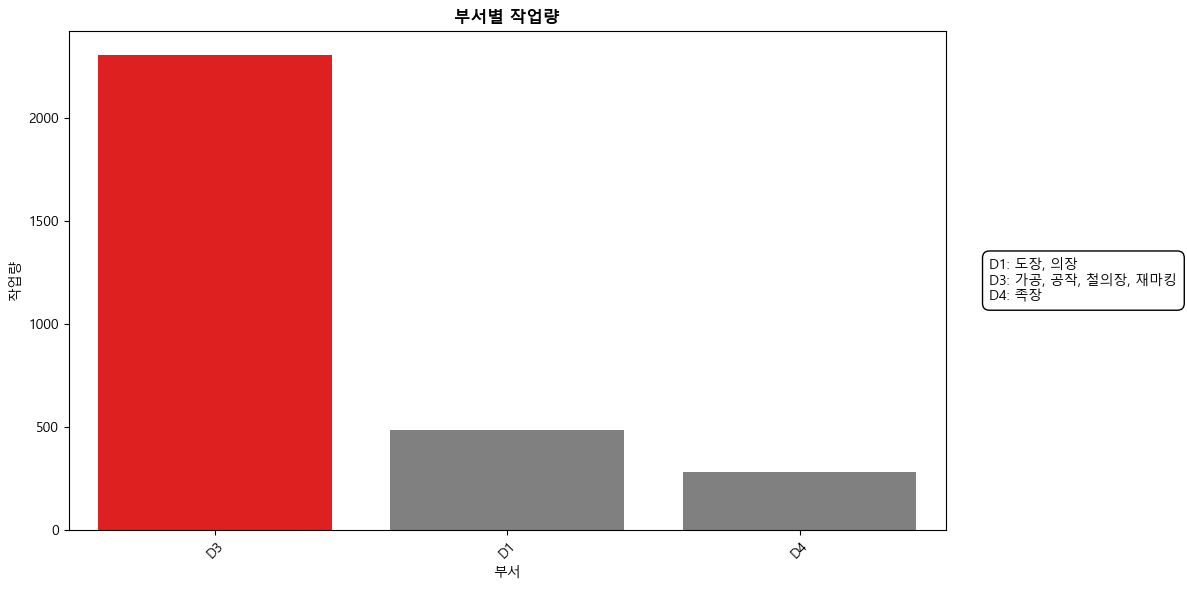

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (필요한 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 각 부서별로 담당하는 D/P&BOM 내역(작업도면명) 가져오기
# 'D/P&BOM 내역'이라는 열이 있다고 가정 (실제 열 이름에 맞게 수정 필요)
department_bom_names = data_cleaned.groupby('직영책임부서')['D/P&BOM 내역'].apply(lambda x: ', '.join(x.unique()))

# 부서별 작업량 계산
department_work_counts = data_cleaned['직영책임부서'].value_counts()

# 최대값 부서 찾기
max_department = department_work_counts.idxmax()

# 부서별 작업량 분석
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['red' if dept == max_department else 'grey' for dept in department_work_counts.index]
sns.barplot(x=department_work_counts.index, y=department_work_counts.values, ax=ax, palette=colors)
plt.title('부서별 작업량', fontweight='bold')
plt.xlabel('부서')
plt.ylabel('작업량')
plt.xticks(rotation=45)

# 모든 부서의 작업도면명을 하나의 레이블로 만들어 우측 중앙에 배치
all_bom_text = "\n".join([f"{dept_name}: {bom_text}" for dept_name, bom_text in department_bom_names.items()])

# 그래프 우측 중앙에 텍스트 박스 표시
ax.text(
    1.05, 0.5,  # x 위치: 그래프 오른쪽, y 위치: 그래프 중앙
    all_bom_text, 
    ha='left', va='center', fontsize=10, transform=ax.transAxes,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)

plt.tight_layout()
plt.show()

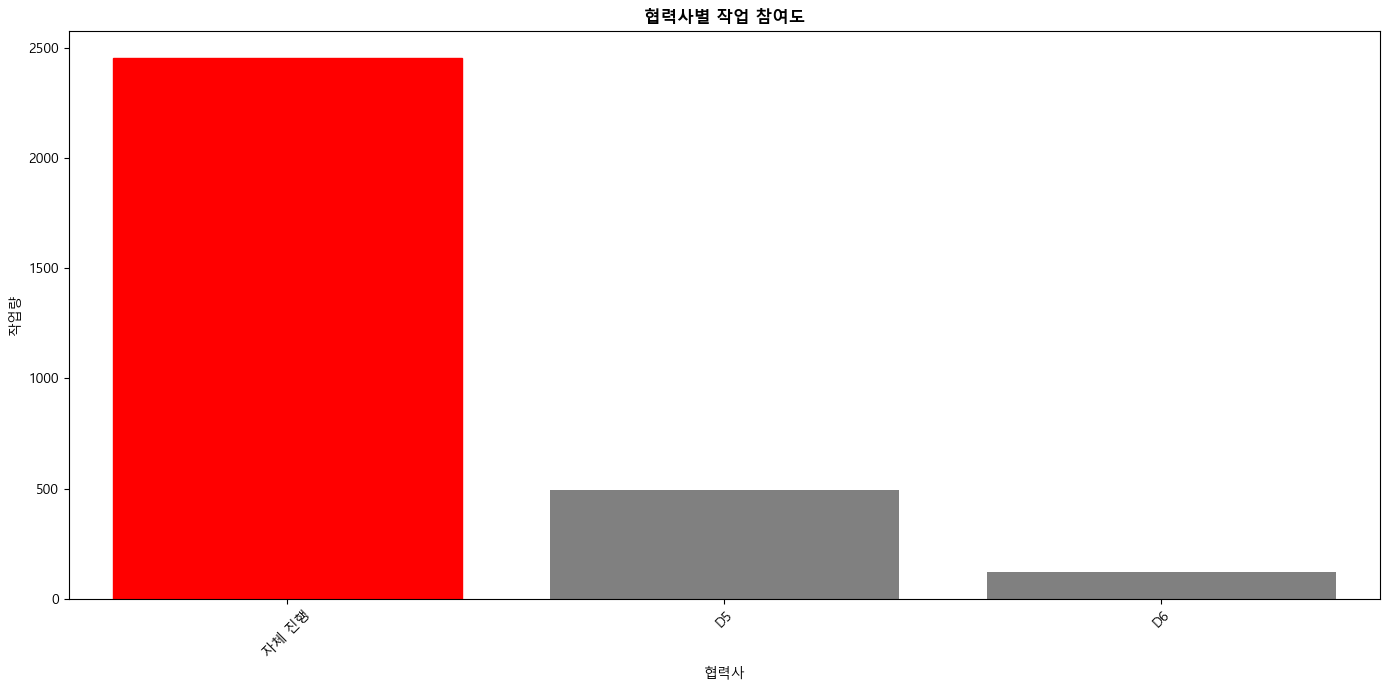

In [24]:
# 협력사별 작업 참여도 분석
plt.figure(figsize=(14, 7))

# 기본적으로 회색으로 막대 그래프 생성
ax = sns.countplot(
    data=data_cleaned, 
    x='협력사', 
    order=data_cleaned['협력사'].value_counts().index,
    color='grey'
)

# 각 막대의 높이를 확인하여, 가장 큰 값의 막대만 빨간색으로 변경
max_height = 0
max_rect = None
for rect in ax.patches:
    if rect.get_height() > max_height:
        max_height = rect.get_height()
        max_rect = rect

if max_rect:
    max_rect.set_color('red')  # 가장 큰 값 가지는 막대 빨간색으로 설정

# 그래프 설정
plt.title('협력사별 작업 참여도', fontweight='bold')
plt.xlabel('협력사')
plt.ylabel('작업량')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\samsung\AppData\Local\Temp\ipykernel_22020\1093711835.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  for bom, row in bom_partner_counts.groupby('D/P&BOM 내역').apply(lambda x: x.iloc[0]).iterrows()
C:\Users\samsung\AppData\Local\Temp\ipykernel_22020\1093711835.py:35: UserWarning: The palette list has more values (14) than needed (3), which may not be intended.
  bars = sns.barplot(data=bom_partner_counts, x='D/P&BOM 내역', y='작업 비율', hue='협력사',


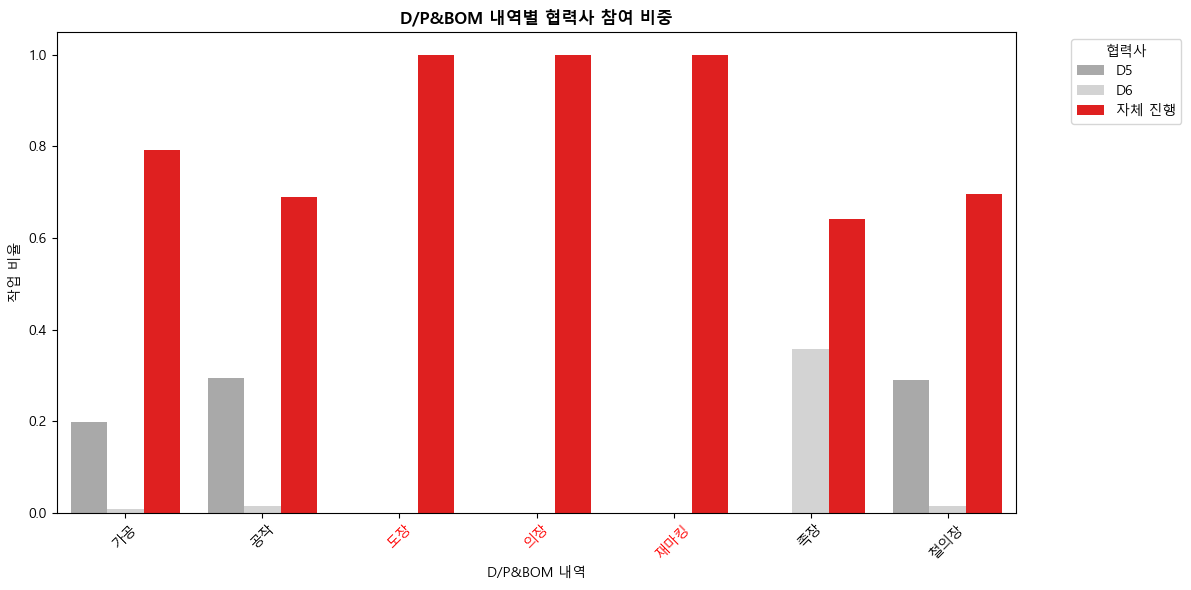

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 설정 (필요한 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'

# D/P&BOM 내역별 협력사 참여 작업량 계산
bom_partner_counts = data_cleaned.groupby(['D/P&BOM 내역', '협력사']).size().reset_index(name='작업량')

# D/P&BOM 내역별 총 작업량 계산
total_bom_counts = bom_partner_counts.groupby('D/P&BOM 내역')['작업량'].sum().reset_index(name='총 작업량')

# 작업량 비율 계산
bom_partner_counts = bom_partner_counts.merge(total_bom_counts, on='D/P&BOM 내역')
bom_partner_counts['작업 비율'] = bom_partner_counts['작업량'] / bom_partner_counts['총 작업량']

# 색상 설정 함수
def get_color(partner):
    if partner == 'D5':
        return 'darkgrey'  # 진한 회색
    elif partner == 'D6':
        return 'lightgrey'  # 연한 회색
    else:
        return 'red'  # 나머지는 빨간색

# D/P&BOM 내역별로 레이블 글자색 설정
label_colors = {
    bom: 'red' if (row['협력사'] not in ['D5', 'D6'] and row['작업 비율'] == 1) else 'black'
    for bom, row in bom_partner_counts.groupby('D/P&BOM 내역').apply(lambda x: x.iloc[0]).iterrows()
}

# 스택드 바 차트로 시각화
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=bom_partner_counts, x='D/P&BOM 내역', y='작업 비율', hue='협력사', 
                   palette=[get_color(partner) for partner in bom_partner_counts['협력사']])
plt.title('D/P&BOM 내역별 협력사 참여 비중', fontweight='bold')
plt.xlabel('D/P&BOM 내역')
plt.ylabel('작업 비율')
plt.xticks(rotation=45)

# 각 D/P&BOM 내역에서 d5, d6가 아닌 항목의 작업 비율이 100%인 경우 레이블 글자색 빨간색으로 설정
for label in bars.get_xticklabels():
    if label_colors[label.get_text()] == 'red':
        label.set_color('red')

plt.legend(title='협력사', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

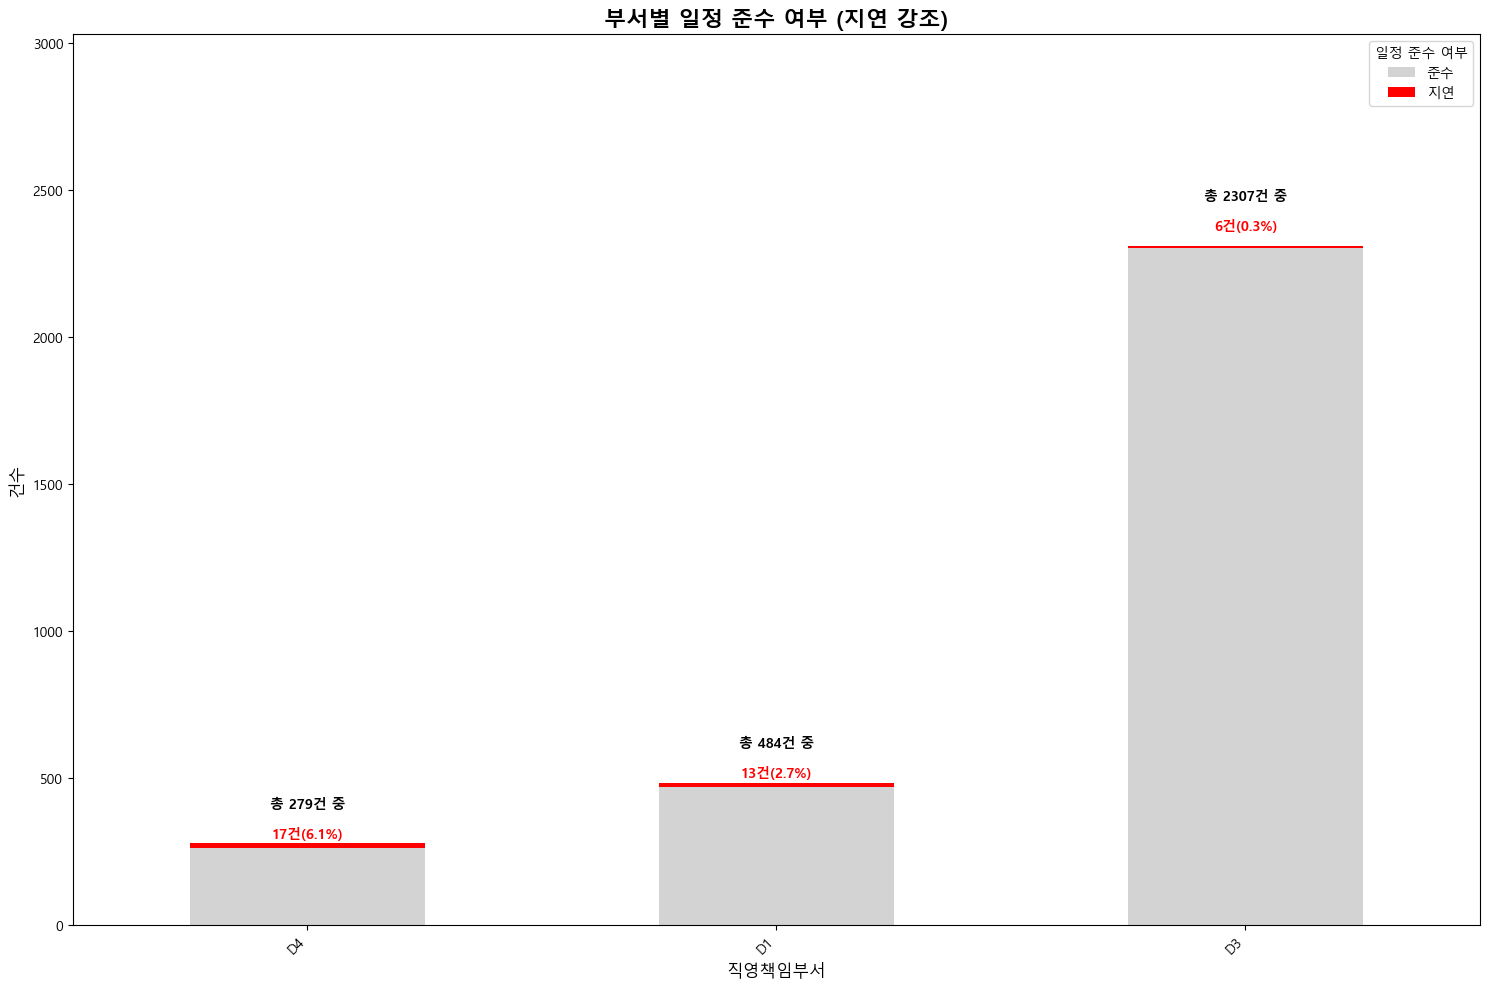

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 한글 폰트 설정 (필요한 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 일정 차이 계산
data_cleaned['일정 차이'] = (data_cleaned['작업 출도실적'] - data_cleaned['작업 출도계획']).dt.days

# 일정 차이 여부에 따른 부서별 데이터 수 계산
data_cleaned['일정 준수 여부'] = data_cleaned['일정 차이'] > 0  # True if late, False if on-time or early
dept_schedule_adherence = data_cleaned.groupby(['직영책임부서', '일정 준수 여부']).size().unstack(fill_value=0)
dept_schedule_adherence.columns = ['준수', '지연']

# 지연 비율 계산
dept_schedule_adherence['지연 비율'] = dept_schedule_adherence['지연'] / (dept_schedule_adherence['준수'] + dept_schedule_adherence['지연'])

# 지연 비율에 따라 정렬
dept_schedule_adherence = dept_schedule_adherence.sort_values('지연 비율', ascending=False)

# 시각화
fig, ax = plt.subplots(figsize=(15, 10))

# 누적 막대 그래프 그리기
bars = dept_schedule_adherence[['준수', '지연']].plot(kind='bar', stacked=True, ax=ax, 
                                                      color=['lightgray', 'red'])

# 값 레이블 표시
for i, (index, row) in enumerate(dept_schedule_adherence.iterrows()):
    total = row['준수'] + row['지연']
    
    # 막대 그래프 상단에서 약간의 간격을 두고 레이블 표시
    y_offset = total * 0.02  # 막대 높이의 2%만큼 위로 이동
    
    ax.text(i, total + y_offset, f"총 {int(total)}건 중\n\n", 
            ha='center', va='bottom', fontweight='bold', color='black', fontsize=10)
    
    if row['지연'] > 0:
        ax.text(i, total + y_offset, f"\n{int(row['지연'])}건({row['지연 비율']:.1%})", 
                ha='center', va='bottom', fontweight='bold', color='red', fontsize=10)

plt.title('부서별 일정 준수 여부 (지연 강조)', fontsize=16, fontweight='bold')
plt.xlabel('직영책임부서', fontsize=12)
plt.ylabel('건수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='일정 준수 여부', loc='upper right')

# y축 범위 설정 (레이블이 잘리지 않도록)
plt.ylim(0, plt.ylim()[1] * 1.25)  # 여유 공간을 더 늘림

plt.tight_layout()
plt.show()

C:\Users\samsung\AppData\Local\Temp\ipykernel_22020\800118767.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_data = data_cleaned.set_index('작업 출도실적').resample('M').size()
c:\Users\samsung\anaconda3\envs\work\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\samsung\anaconda3\envs\work\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\samsung\anaconda3\envs\work\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn(

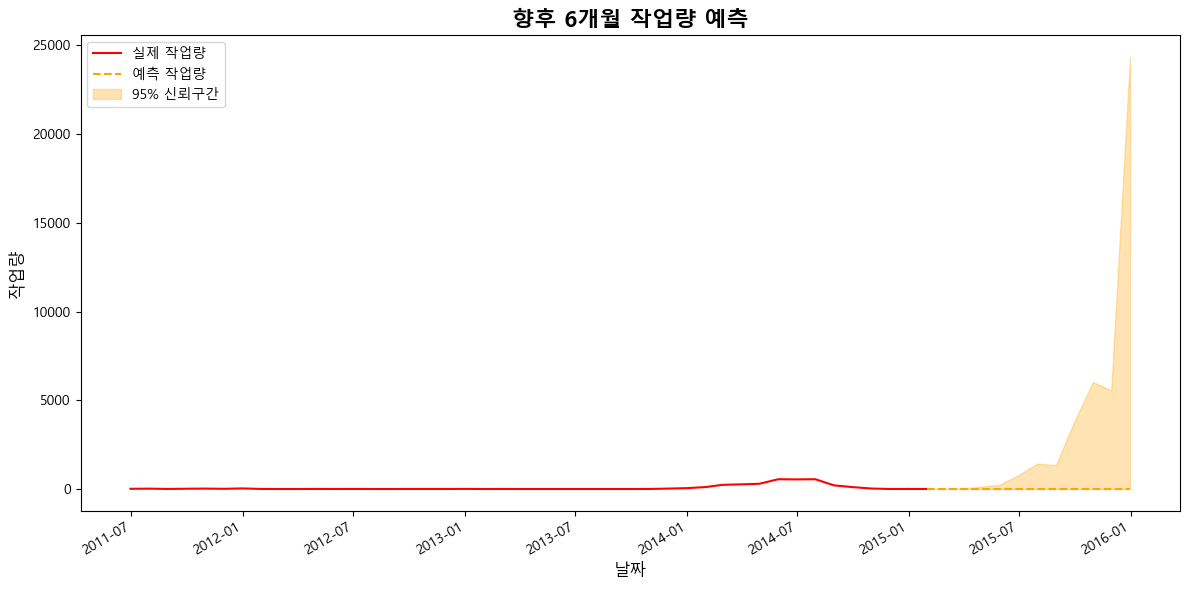


향후 6개월 예측 작업량:
2015-01: 0.00
2015-02: 0.00
2015-03: 0.00
2015-04: 0.00
2015-05: 0.00
2015-06: 0.00
2015-07: 0.00
2015-08: 0.00
2015-09: 0.00
2015-10: 0.00
2015-11: 0.00
2015-12: 0.00


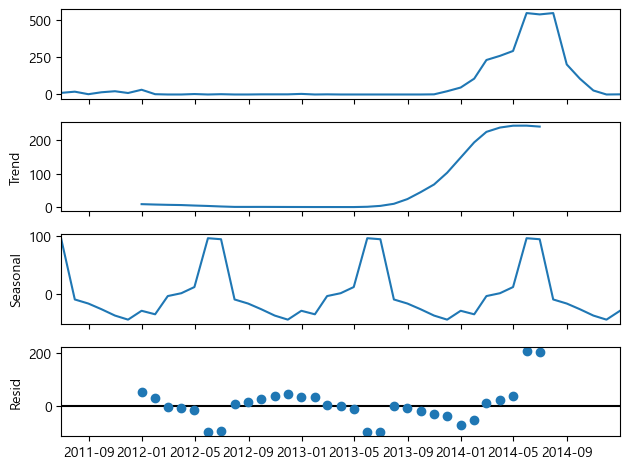

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 시계열 데이터 준비
time_series_data = data_cleaned.set_index('작업 출도실적').resample('M').size()

# SARIMAX 모델 피팅 (로그 변환 적용)
model = SARIMAX(np.log1p(time_series_data), order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# 예측
forecast_periods = 12  # 향후 6개월 예측
forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = np.expm1(forecast.predicted_mean)  # 로그 변환 역변환
forecast_ci = np.expm1(forecast.conf_int())  # 로그 변환 역변환

# 음수 값을 0으로 설정
forecast_mean[forecast_mean < 0] = 0
forecast_ci[forecast_ci < 0] = 0

# 실제 데이터의 마지막 값과 예측 데이터의 첫 번째 값을 연결
connection_point = pd.Series([time_series_data.iloc[-1], forecast_mean.iloc[0]], 
                             index=[time_series_data.index[-1], forecast_mean.index[0]])

# 시각화
plt.figure(figsize=(12, 6))

# 실제 데이터
plt.plot(time_series_data.index, time_series_data.values, color='red', label='실제 작업량')

# 실제 데이터의 마지막과 예측 데이터의 첫 번째 점을 연결
plt.plot(connection_point.index, connection_point.values, color='red')

# 예측 데이터
plt.plot(forecast_mean.index, forecast_mean.values, color='orange', linestyle='--', label='예측 작업량')

# 신뢰 구간
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.3, label='95% 신뢰구간')

plt.title('향후 6개월 작업량 예측', fontsize=16, fontweight='bold')
plt.xlabel('날짜', fontsize=12)
plt.ylabel('작업량', fontsize=12)
plt.legend(fontsize=10)

# x축 날짜 포맷 설정
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

# 예측 결과 출력
print("\n향후 6개월 예측 작업량:")
for date, value in zip(forecast_mean.index, forecast_mean.values):
    print(f"{date.strftime('%Y-%m')}: {value:.2f}")

# 시계열 분해 (별도의 그래프로 표시)
decomposition = seasonal_decompose(time_series_data, model='additive', period=12)
decomposition.plot()
plt.tight_layout()
plt.show()

## 9/12 수정본

In [56]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

In [57]:
# P1 P2 P3 따로 데이터
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 경로
file_path = '../raw/3_구조의장 생산설계 DP 현황_구조생설 D_P&BOM TOTAL LIST 조회(3개 호선)_설명포함.xlsx'

# 첫 번째 시트의 데이터를 읽습니다.
df = pd.read_excel(file_path, sheet_name=1)  # 시트 인덱스 0은 첫 번째 시트를 의미합니다. # 시트1
df1 = pd.read_excel(file_path, sheet_name=2) # 시트2
df2 = pd.read_excel(file_path, sheet_name=3) # 시트3


# 데이터의 첫 몇 행을 출력하여 확인합니다.
print(df.head())

   No 프로젝트      D/P&BOM 코드 D/P&BOM 내역 설계기능 도면종류  협력사 직영책임부서    작업 출도계획  \
0   1   P1  DPBOM000000001         도장   F1   D1  NaN     D1 2014-07-13   
1   2   P1  DPBOM000000002         도장   F1   D1  NaN     D1 2014-07-13   
2   3   P1  DPBOM000000003         가공   F2   D2   D5     D3 2014-07-14   
3   4   P1  DPBOM000000004         족장   F3   D3  NaN     D4 2014-07-21   
4   5   P1  DPBOM000000005         공작   F2   D4   D5     D3 2014-07-21   

     작업 출도실적  
0 2014-07-10  
1 2014-07-10  
2 2014-07-09  
3 2014-06-30  
4 2014-06-16  


In [77]:
import pandas as pd
# P1 P2 P3 합친 데이터

# 엑셀 파일에서 모든 시트의 이름을 가져옵니다.
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# 첫 번째 시트 이름을 제외한 나머지 시트 이름들
sheets_to_read = sheet_names[1:]  # 첫 번째 시트는 제외

# 나머지 시트의 데이터를 읽어와서 리스트에 저장합니다.
dataframes = [pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets_to_read]

# 시트별 데이터프레임을 하나로 합칩니다.
combined_df = pd.concat(dataframes, ignore_index=True)

# 결과 확인
print(combined_df.head())


   No 프로젝트      D/P&BOM 코드 D/P&BOM 내역 설계기능 도면종류  협력사 직영책임부서    작업 출도계획  \
0   1   P1  DPBOM000000001         도장   F1   D1  NaN     D1 2014-07-13   
1   2   P1  DPBOM000000002         도장   F1   D1  NaN     D1 2014-07-13   
2   3   P1  DPBOM000000003         가공   F2   D2   D5     D3 2014-07-14   
3   4   P1  DPBOM000000004         족장   F3   D3  NaN     D4 2014-07-21   
4   5   P1  DPBOM000000005         공작   F2   D4   D5     D3 2014-07-21   

     작업 출도실적  
0 2014-07-10  
1 2014-07-10  
2 2014-07-09  
3 2014-06-30  
4 2014-06-16  


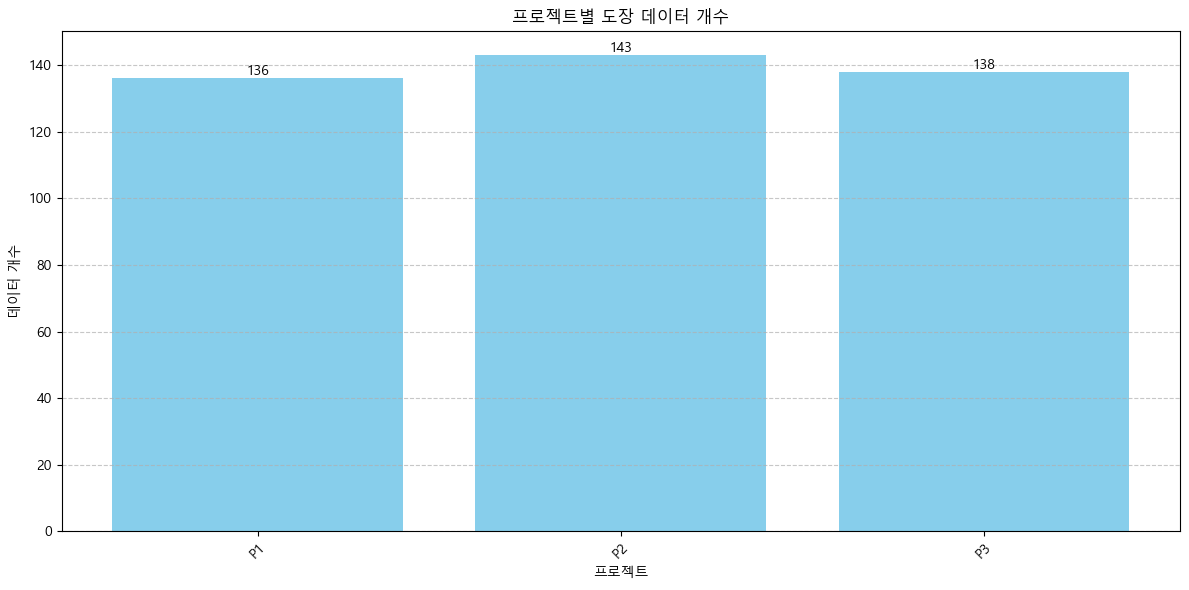

In [78]:
# 'D/P&BOM 내역' 및 '프로젝트' 컬럼이 있는지 확인합니다.
if 'D/P&BOM 내역' in combined_df.columns and '프로젝트' in combined_df.columns:
    # 'D/P&BOM 내역' 컬럼이 '도장'인 데이터 필터링
    filtered_df = combined_df[combined_df['D/P&BOM 내역'] == '철의장']

    # 프로젝트별로 데이터 개수 집계
    project_counts = filtered_df['프로젝트'].value_counts()

    # 프로젝트 이름으로 정렬
    sorted_project_counts = project_counts.sort_index()

    # 플로팅
    plt.figure(figsize=(12, 6))
    bars = plt.bar(sorted_project_counts.index, sorted_project_counts.values, color='skyblue')

    # 각 막대 위에 데이터 값을 표시
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    plt.title('프로젝트별 도장 데이터 개수')
    plt.xlabel('프로젝트')
    plt.ylabel('데이터 개수')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("데이터프레임에 'D/P&BOM 내역' 또는 '프로젝트' 열이 없습니다.")

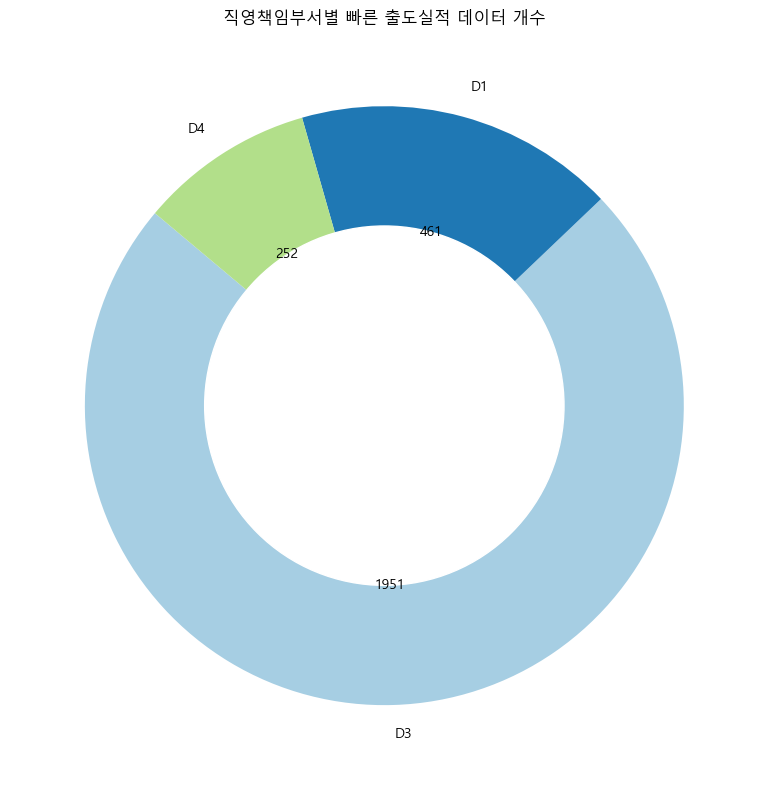

In [79]:

# '작업 출도실적', '작업 출도계획', '직영책임부서' 컬럼이 있는지 확인합니다.
if all(col in combined_df.columns for col in ['작업 출도실적', '작업 출도계획', '직영책임부서']):
    # '작업 출도실적'과 '작업 출도계획'이 서로 비교 가능한 형식인지 확인 (날짜 형식으로 변환)
    combined_df['작업 출도실적'] = pd.to_datetime(combined_df['작업 출도실적'], errors='coerce')
    combined_df['작업 출도계획'] = pd.to_datetime(combined_df['작업 출도계획'], errors='coerce')

    # '작업 출도실적'이 '작업 출도계획'보다 빠른 데이터를 필터링
    faster_data = combined_df[combined_df['작업 출도실적'] < combined_df['작업 출도계획']]

    # 직영책임부서별로 그룹화하여 데이터 개수 집계
    department_counts = faster_data['직영책임부서'].value_counts()

    # 도넛 차트 플로팅
    plt.figure(figsize=(8, 8))

    def func(pct, allvalues):
        absolute = int(round(pct / 100. * sum(allvalues)))
        return f'{absolute}'

    plt.pie(department_counts, labels=department_counts.index, autopct=lambda pct: func(pct, department_counts), startangle=140, colors=plt.cm.Paired(range(len(department_counts))))
    plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))  # 도넛 모양 만들기

    plt.title('직영책임부서별 빠른 출도실적 데이터 개수')
    plt.tight_layout()
    plt.show()
else:
    print("데이터프레임에 필요한 열이 없습니다.")

In [81]:
# 파일 경로 정의
json_file_path = r'C:\Users\samsung\Documents\html\dashboard\data.json'

# 기존 파일이 존재하면 삭제
if os.path.exists(json_file_path):
    os.remove(json_file_path)
    print(f"파일 '{json_file_path}'이(가) 삭제되었습니다.")

# JSON 파일로 저장
department_counts_df = department_counts.reset_index()
department_counts_df.columns = ['직영책임부서', 'count']
department_counts_df.to_json(json_file_path, orient='records', force_ascii=False)
print(f"파일 '{json_file_path}'이(가) 새로 생성되었습니다.")

파일 'C:\Users\samsung\Documents\html\dashboard\data.json'이(가) 삭제되었습니다.
파일 'C:\Users\samsung\Documents\html\dashboard\data.json'이(가) 새로 생성되었습니다.


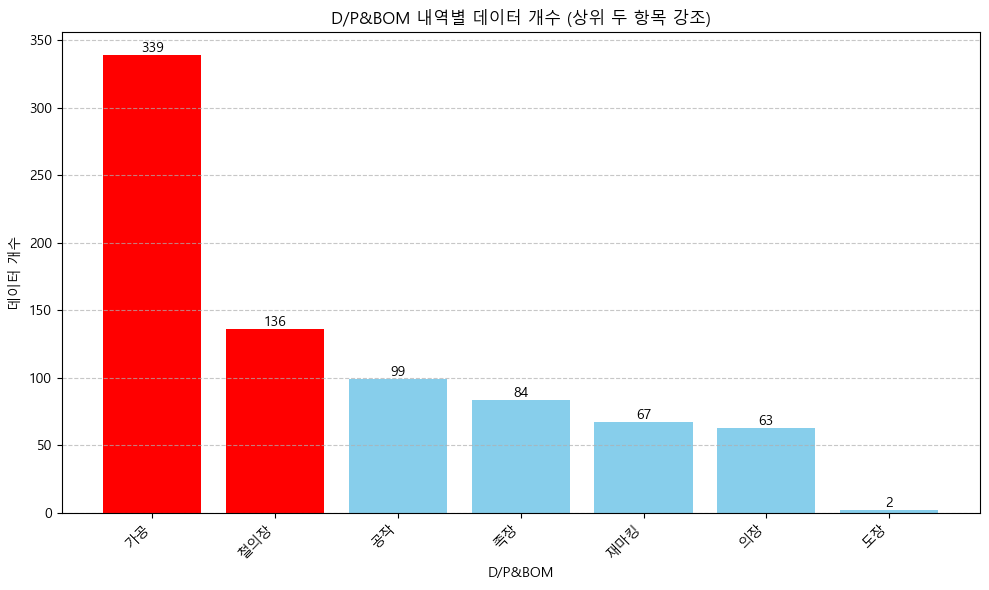

In [89]:
# 'D/P&BOM' 컬럼이 있는지 확인합니다.
if 'D/P&BOM 내역' in df.columns:
    # 'D/P&BOM 내역' 내역별로 데이터 개수 집계
    dp_bom_counts = df['D/P&BOM 내역'].value_counts()

    # 가장 많은 두 가지 항목 추출
    top_two = dp_bom_counts.nlargest(2)

    # 그래프의 색상 설정
    colors = ['red' if item in top_two.index else 'skyblue' for item in dp_bom_counts.index]

    # 플로팅
    plt.figure(figsize=(10, 6))
    bars = plt.bar(dp_bom_counts.index, dp_bom_counts.values, color=colors)

    # 각 막대 위에 데이터 값을 표시
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            int(yval),
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

    plt.title('D/P&BOM 내역별 데이터 개수 (상위 두 항목 강조)')
    plt.xlabel('D/P&BOM')
    plt.ylabel('데이터 개수')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("데이터프레임에 'D/P&BOM' 열이 없습니다.")

In [95]:
# 파일 경로 정의
json_file_path = r'C:\Users\samsung\Documents\html\dashboard\data1.json'

# 기존 파일이 존재하면 삭제
if os.path.exists(json_file_path):
    os.remove(json_file_path)
    print(f"파일 '{json_file_path}'이(가) 삭제되었습니다.")

# JSON 파일로 저장
dp_bom_counts_df = dp_bom_counts.reset_index()
dp_bom_counts_df.columns = ['name', 'value']
dp_bom_counts_df.to_json(json_file_path, orient='records', force_ascii=False)
print(f"파일 '{json_file_path}'이(가) 새로 생성되었습니다.")

파일 'C:\Users\samsung\Documents\html\dashboard\data1.json'이(가) 삭제되었습니다.
파일 'C:\Users\samsung\Documents\html\dashboard\data1.json'이(가) 새로 생성되었습니다.
